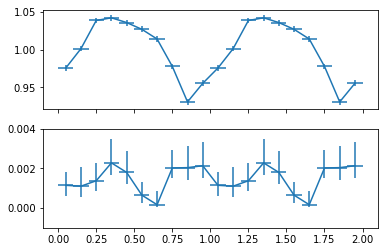

In [2]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
# from astropy.io import ascii

phase = [0]*20
pbin = [0]*20
rate = [0]*20
rerr = [0]*20 
tin = [0]*20
tinl = [0]*20
tinu = [0]*20
normt =[0]*20
index =[0]*20
normpl =[0]*20
normgauss = [0]*20
normg_l = [0]*20
normg_u = [0]*20
pha_ini = [0]*20
i = 0
for line in open('1s_orb1_wave.txt','r'):
	line = line.strip()
	if not line.startswith('#'):
		columns = line.split()
		phase[i] = float(columns[0])+0.05
		pbin[i] = float(columns[1])
		rate[i] = float(columns[2])
		rerr[i] = float(columns[3])
		tin[i] = float(columns[4])
		tinl[i] = float(columns[5])
		tinu[i] = float(columns[6])
		normt[i] = float(columns[7])
		index[i] = float(columns[8])
		normpl[i] = float(columns[9])
		normgauss[i] = float(columns[10])
		normg_l[i] = float(columns[11])/1.64
		normg_u[i] = float(columns[12])/1.64
		pha_ini[i] = float(columns[0])
		i = i+1
f,axarr = plt.subplots(2, sharex=True)
axarr[0].errorbar(phase,rate,xerr=pbin,yerr=rerr)
axarr[1].errorbar(phase,normgauss,xerr=pbin,yerr=[normg_l,normg_u])
axarr[1].set_ylim([-0.001,0.004])
plt.show()

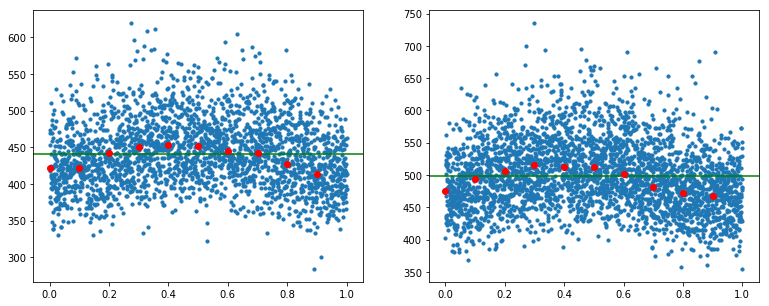

In [3]:
time1,rate1,error1 = [0]*2485,[0]*2485,[0]*2485
nbins1 = 10
period1 = 88.1537191828

time2,rate2,error2 = [0]*3212,[0]*3212,[0]*3212
nbins2 = 10
period2 = 87.9173476001

period1,period2 = 88.26, 88.26

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
i=0
with open('gx_1s_orb1_lc.txt','r') as f:
    for line in f.readlines(): 
        if not line.startswith('#'):
            line = line.strip()
            columns = line.split()
            time1[i] = float(columns[1])
            rate1[i] = float(columns[2])
            error1[i] = float(columns[3])
            i=i+1
plt.axhline(sum(rate1)/len(rate1),color='g')          
foldtime1 = [t/period1 for t in time1]
foldtime1 = [ft%1 for ft in foldtime1]    
plt.scatter(foldtime1,rate1,s=10)
width1 = 1.0/float(nbins1)
bins1 = np.zeros(nbins1)
weights1 = np.zeros(nbins1)
for j in range(len(rate1)): 
    n = int(foldtime1[j]/width1)
    weight1 = error1[j]**-2.0
    bins1[n] += rate1[j]*weight1
    weights1[n] += weight1
bins1 /= weights1
binerr1 = np.sqrt(1.0/weights1)
binedge1 = np.arange(nbins1)*width1
plt.errorbar(binedge1,bins1,yerr=binerr1,linestyle='none',marker='o',color='r')
# plt.ylim(400,500)


plt.subplot(1,2,2)
i=0
with open('gx_1s_orb2_lc.txt','r') as f:
    for line in f.readlines(): 
        if not line.startswith('#'):
            line = line.strip()
            columns = line.split()
            time2[i] = float(columns[1])
            rate2[i] = float(columns[2])
            error2[i] = float(columns[3])
            i=i+1
plt.axhline(sum(rate2)/len(rate2),color='g')          
foldtime2 = [t/period2 for t in time2]
foldtime2 = [ft%1 for ft in foldtime2]    
plt.scatter(foldtime2,rate2,s=10)
width2 = 1.0/float(nbins2)
bins2 = np.zeros(nbins2)
weights2 = np.zeros(nbins2)
for j in range(len(rate2)): 
    n = int(foldtime2[j]/width2)
    weight2 = error2[j]**-2.0
    bins2[n] += rate2[j]*weight2
    weights2[n] += weight2
bins2 /= weights2
binerr2 = np.sqrt(1.0/weights2)
binedge2 = np.arange(nbins2)*width2
plt.errorbar(binedge2,bins2,yerr=binerr2,linestyle='none',marker='o',color='r')

plt.show()

88.1537191828 87.9173476001


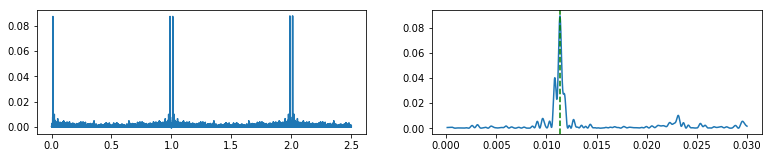

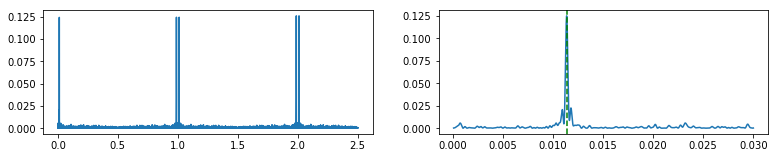

In [4]:
time1 = np.array(time1).T
rate1 = np.array(rate1).T
frequency1, power1 = LombScargle(time1,rate1,error1).autopower()
plt.figure(figsize=(13,5))
plt.subplot(2,2,1)
plt.plot(frequency1,power1)
plt.subplot(2,2,2)
frequency1 = np.linspace(0.0001,0.03,50000)
power1 = LombScargle(time1,rate1,error1).power(frequency1)
plt.plot(frequency1,power1)
plt.axvline(frequency1[np.argmax(power1)],color='g',linestyle='dashed')          
period1 = frequency1[np.argmax(power1)]**-1

time2 = np.array(time2).T
rate2 = np.array(rate2).T
frequency2, power2 = LombScargle(time2,rate2,error2).autopower()
plt.figure(figsize=(13,5))
plt.subplot(2,2,3)
plt.plot(frequency2,power2)
plt.subplot(2,2,4)
frequency2 = np.linspace(0.0001,0.03,50000)
power2 = LombScargle(time2,rate2,error2).power(frequency2)
plt.plot(frequency2,power2)
plt.axvline(frequency2[np.argmax(power2)],color='g',linestyle='dashed')          
period2 = frequency2[np.argmax(power2)]**-1

print period1, period2
plt.show()

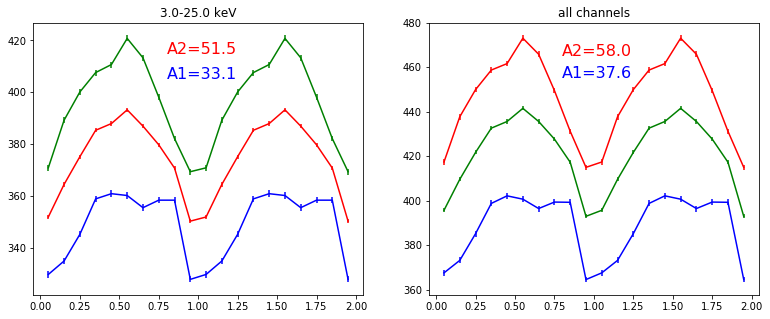

In [39]:
i=0
rate,rate1,rate2 = [0]*20,[0]*20,[0]*20
err,err1,err2 = [0]*20,[0]*20,[0]*20
with open('1s_countrate.txt','r') as f:
    for line in f.readlines(): 
        if not line.startswith('#'):
            line = line.strip()
            columns = line.split()
            rate[i] = float(columns[0])
            err[i] = float(columns[1])
            rate1[i] = float(columns[2])
            err1[i] = float(columns[3])
            rate2[i] = float(columns[4])
            err2[i] = float(columns[5])
            i=i+1
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.text(0.8,415,'A2=%s' %(max(rate2)-min(rate2)),fontsize=16,color='r')
plt.text(0.8,405,'A1=%s' %(max(rate1)-min(rate1)),fontsize=16,color='b')
plt.title('3.0-25.0 keV')
plt.errorbar(phase,rate,yerr=err,color='r')
plt.errorbar(phase,rate1,yerr=err1,color='b')
plt.errorbar(phase,rate2,yerr=err2,color='g')
plt.subplot(1,2,2)
plt.title('all channels')
i=0
rate,rate1,rate2 = [0]*20,[0]*20,[0]*20
err,err1,err2 = [0]*20,[0]*20,[0]*20
with open('1s_countrate_noticeall.txt','r') as f:
    for line in f.readlines(): 
        if not line.startswith('#'):
            line = line.strip()
            columns = line.split()
            rate[i] = float(columns[0])
            err[i] = float(columns[1])
            rate1[i] = float(columns[2])
            err1[i] = float(columns[3])
            rate2[i] = float(columns[4])
            err2[i] = float(columns[5])
            i=i+1
plt.errorbar(phase,rate,yerr=err,color='g')
plt.errorbar(phase,rate1,yerr=err1,color='b')
plt.errorbar(phase,rate2,yerr=err2,color='r')
plt.text(0.8,465,'A2=%s' %(max(rate2)-min(rate2)),fontsize=16,color='r')
plt.text(0.8,455,'A1=%s' %(max(rate1)-min(rate1)),fontsize=16,color='b')
plt.show()

In [6]:
tint_s = 523929539.816
period = 88.26
bins = 10
for j in range(0,bins):
    with open('tint_orb1_ph{0:02d}_{1:02d}.txt'.format(j,j+1),'w') as outfile:
        for i in range(0,29):
            outfile.write('%.3f %.3f\n' %(tint_s+(234+i+1.0/bins*j)*period, tint_s+(234+i+1.0/bins*(j+1))*period))
print 'orbit 1 phase time intervals created'
for j in range(0,bins):
    with open('tint_orb2_ph{0:02d}_{1:02d}.txt'.format(j,j+1),'w') as outfile:
        for i in range(0,38):
            outfile.write('%.3f %.3f\n' %(tint_s+(289+i+1.0/bins*j)*period, tint_s+(289+i+1.0/bins*(j+1))*period))
print 'orbit 2 phase time intervals created'

orbit 1 phase time intervals created
orbit 2 phase time intervals created


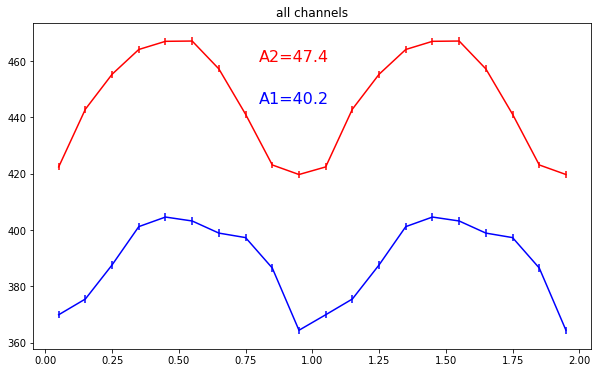

In [38]:
i=0
rate1,rate2 = [0]*20,[0]*20
err1,err2 = [0]*20,[0]*20
with open('countrate_tint.txt','r') as f:
    for line in f.readlines(): 
        if not line.startswith('#'):
            line = line.strip()
            columns = line.split()
            rate1[i] = float(columns[0])
            err1[i] = float(columns[1])
            rate2[i] = float(columns[2])
            err2[i] = float(columns[3])
            i=i+1
plt.figure(figsize=(10,6))
plt.title('all channels')
plt.errorbar(phase,rate1,yerr=err1,color='b')
# plt.step(phase,rate1)
plt.errorbar(phase,rate2,yerr=err2,color='r')
# plt.step(phase,rate2)
plt.text(0.8,460,'A2=%s' %(max(rate2)-min(rate2)),fontsize=16,color='r')
plt.text(0.8,445,'A1=%s' %(max(rate1)-min(rate1)),fontsize=16,color='b')
plt.show()

{0: 'fit3_orb1_pl.txt', 1: 'fit3_orb1_pl_err.txt'}


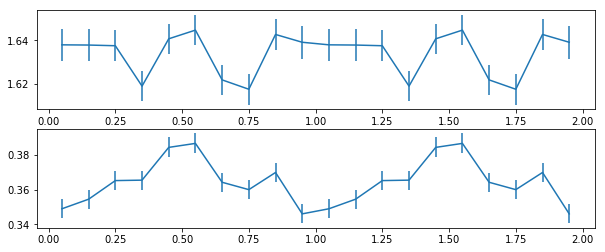

{0: 'fit3_orb1_dbb.txt', 1: 'fit3_orb1_dbb_err.txt'}


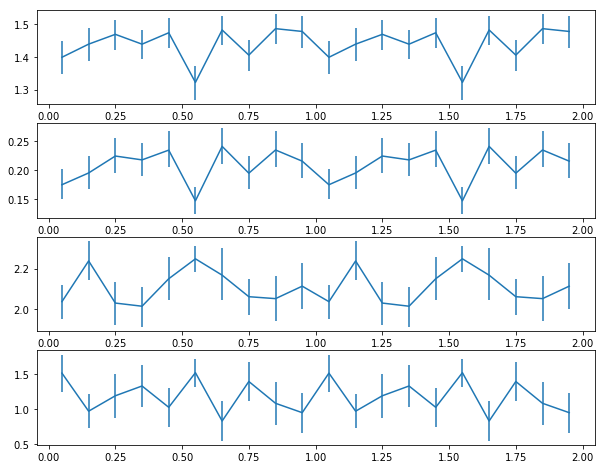

In [38]:
# n: number of parameter per phase-spectrum (fit); nbin: number of phases per period; 
# k: ordinal of interesting parameter in the first spectra, eg. 2rd,4th,5th--{0:2,1:4,3:5}  
# infile:[0] for the parameter;[1] for the parameter error. 
# n = 5
# nbin = 10
# k = {0:2,1:3,2:4,3:5}
# infile = {0:'fit3_orb1_dbb.txt',1:'fit3_orb1_dbb_err.txt'}

def main():
    n = 3
    nbin = 10
    k = {0:2,1:3}
    infile = {0:'fit3_orb1_pl.txt',1:'fit3_orb1_pl_err.txt'}
    print infile
    phase_parplot(n,nbin,k,infile)
    plt.show()

    n = 5
    nbin = 10
    k = {0:2,1:3,2:4,3:5}
    infile = {0:'fit3_orb1_dbb.txt',1:'fit3_orb1_dbb_err.txt'}
    print infile
    phase_parplot(n,nbin,k,infile)
    plt.show()
    


def phase_parplot(n,nbin,k,infile): 
    p = {i : [0]*nbin*2 for i in range(0,len(k))}
    j = 0
    with open(infile[0],'r') as f:
        for line in f.readlines():
            if not line.startswith('#'):
                line = line.strip()
                columns = line.split()
                for i in range(0,len(k)):
                    p[i][j] = float(columns[k[i]-1])
                j += 1
    p_errl = {i: [0]*nbin*2 for i in range(0,len(k))}
    p_erru = {i: [0]*nbin*2 for i in range(0,len(k))}
    with open(infile[1],'r') as f:
        for line in f.readlines():
            if not line.startswith('#'):
                if line.lstrip()[0].isdigit():
                    line = line.strip()
                    columns = line.split()
                    for i in range(0,len(k)):
                        for j in range(0,nbin):
                            if columns[0] == str(k[i]+j*n):
                                p_errl[i][j] = p[i][j]-float(columns[1])
                                p_errl[i][j+nbin] = p[i][j]-float(columns[1])
                                p_erru[i][j] = float(columns[2])-p[i][j]
                                p_erru[i][j+nbin] = float(columns[2])-p[i][j]
    plt.figure(figsize=(10,2*len(k)))
    for i in range(0,len(k)):
        plt.subplot(len(k),1,i+1)
        plt.errorbar(phase,p[i],yerr=[p_errl[i],p_erru[i]])
    
if __name__ == '__main__':
    main()